In [1]:
import itk
import numpy as np

def transform_image(input_image, degrees, scale, translation=(13.0, 17.0)):
    # Define image types
    InputPixelType = itk.UC
    OutputPixelType = itk.UC
    Dimension = 2
    
    InputImageType = itk.Image[InputPixelType, Dimension]
    OutputImageType = itk.Image[OutputPixelType, Dimension]

    # Convert angle to radians
    degrees_to_radians = np.pi / 180.0
    angle = degrees * degrees_to_radians

    # Create the similarity transform
    TransformType = itk.Similarity2DTransform[itk.D]
    transform = TransformType.New()

    # Get image spacing, origin, and size
    spacing = input_image.GetSpacing()
    origin = input_image.GetOrigin()
    size = input_image.GetLargestPossibleRegion().GetSize()

    # Set the center of rotation to the center of the image
    rotation_center = [origin[0] + spacing[0] * size[0] / 2.0,
                       origin[1] + spacing[1] * size[1] / 2.0]
    transform.SetCenter(rotation_center)

    # Apply rotation, scaling, and translation
    transform.SetAngle(angle)
    transform.SetScale(scale)
    transform.SetTranslation(translation)

    # Set up the resample filter
    FilterType = itk.ResampleImageFilter[InputImageType, OutputImageType]
    resample_filter = FilterType.New()

    # Set the resampling parameters
    resample_filter.SetInput(input_image)
    resample_filter.SetOutputOrigin(origin)
    resample_filter.SetOutputSpacing(spacing)
    resample_filter.SetSize(size)
    resample_filter.SetOutputDirection(input_image.GetDirection())
    resample_filter.SetTransform(transform)
    
    # Set interpolator
    InterpolatorType = itk.LinearInterpolateImageFunction[InputImageType, itk.D]
    interpolator = InterpolatorType.New()
    resample_filter.SetInterpolator(interpolator)

    # Set default pixel value (if outside transformed region)
    resample_filter.SetDefaultPixelValue(100)

    # Update filter to perform the transformation
    resample_filter.Update()

    # Return the transformed image
    return resample_filter.GetOutput()

# Example usage
input_image_file = "Brain_CT.jpg"  # Replace with your input image path
output_image_file = "rotated_scaled_output.png"  # Replace with your desired output path

# Read input image
reader = itk.ImageFileReader[itk.Image[itk.UC, 2]].New()
reader.SetFileName(input_image_file)
reader.Update()

# Transform the image
transformed_image = transform_image(reader.GetOutput(), degrees=-10, scale=2)

# Write the transformed image
writer = itk.ImageFileWriter[itk.Image[itk.UC, 2]].New()
writer.SetFileName(output_image_file)
writer.SetInput(transformed_image)
writer.Update()


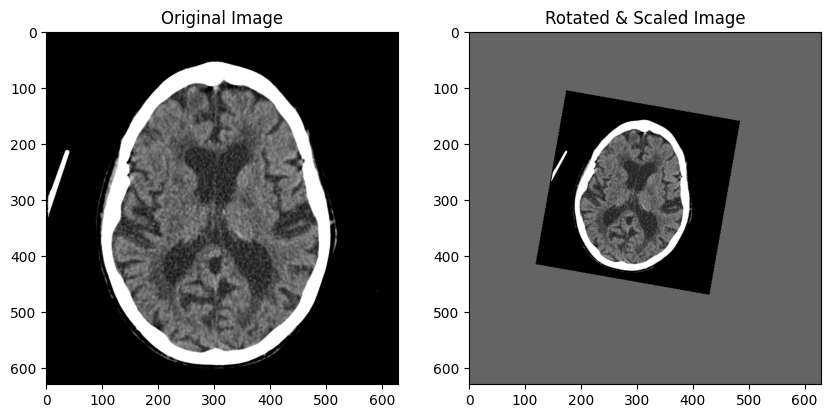

In [2]:
# Display the images
import matplotlib.pyplot as plt

input_image = itk.GetArrayFromImage(reader.GetOutput())
transformed_image = itk.GetArrayFromImage(transformed_image)

plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(input_image, cmap='gray')
plt.title('Original Image')
plt.axis('on')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image, cmap='gray')
plt.title('Rotated & Scaled Image')
plt.axis('on')

plt.show()

In [3]:
# Explain what happen when scale image by 2
# The image is scaled by a factor of 2, which means that the size of the image is doubled in both the x and y directions.
# This results in the image being zoomed in and appearing larger in the output image.
# The pixel values are interpolated to fill in the gaps created by the scaling, resulting in a smoother appearance of the image.

# Print image size
print("Original image size:", input_image.shape)
print("Transformed image size:", transformed_image.shape)

# Explain here why the image sizes are same
# The image sizes are the same because the scaling transformation is applied uniformly in both the x and y directions.
# This means that the aspect ratio of the image is preserved, and the size of the image remains the same after scaling.
# The pixel values are interpolated to fill in the gaps created by the scaling, resulting in a smoother appearance of the image.



Original image size: (630, 630)
Transformed image size: (630, 630)


(-0.5, 629.5, 629.5, -0.5)

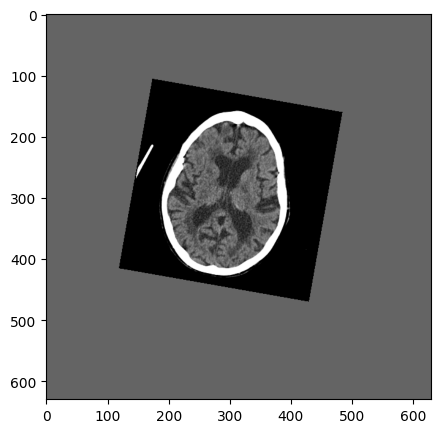

In [4]:
plt.figure(figsize=(10, 5))
plt.imshow(transformed_image, cmap='gray')
#plt.imshow(input_image, cmap='gray')
plt.title('')
plt.axis('on')


In [7]:
# print pixel spacing of input and output image
print("Input image spacing:", reader.GetOutput().GetSpacing())

reader = itk.ImageFileReader[itk.Image[itk.UC, 2]].New()
reader.SetFileName("transformed_image.png")

print("Output image spacing:", reader.GetOutput().GetSpacing())

Input image spacing: itkVectorD2 ([1, 1])
Output image spacing: itkVectorD2 ([1, 1])
